In [1]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import numpy.random
import matplotlib.pyplot as mpl
import sympy as sp
import time
import plotly.express as px
import pandas as pd
import librosa
import IPython.display as ipd
from scipy.fft import fft, ifft, fftfreq
import scipy.signal as sig
import scipy.optimize as opt
from matplotlib import pyplot as plt
from matplotlib import animation
%matplotlib notebook

In [2]:
f = 1.82/np.sqrt(3)
mic1 = [0,0,0]
mic2 = [0,-f,0]
mic3 = [-np.sqrt(3)/2*f,1/2*f,0]
mic4 = [np.sqrt(3)/2*f,1/2*f,0]

In [17]:
Dcor = np.random.rand(50000, 3)

#Dcor = []
#for i in np.arange(50):
#    for j in np.arange(50):
#        for k in np.arange(25):
#            Dcor.append([i/5-5,j/5-5,k/5])

x = 10
y = 10
z = 10
rmax = 20
rmin = 0
for i in range(len(Dcor)):
    if Dcor[i,0] < 0.5:
        Dcor[i,0] = -2*x*Dcor[i,0]
    else:
        Dcor[i,0] = 2*x*(Dcor[i,0] - 0.5)
        
    if Dcor[i,1] < 0.5:
        Dcor[i,1] = -2*y*Dcor[i,1]
    else:
        Dcor[i,1] = 2*y*(Dcor[i,1] - 0.5)
    
    Dcor[i,2] = z*Dcor[i,2]

OD = []
AD = []
BD = []
CD = []

NewDcor = []

for v in Dcor:
    if v[0]**2 + v[1]**2 + v[2]**2 < rmax**2 and rmin**2 < v[0]**2 + v[1]**2 + v[2]**2:
        OD.append(np.sqrt((v[0]-mic1[0])**2 + (v[1]-mic1[1])**2 + (v[2]-mic1[2])**2))
        AD.append(np.sqrt((v[0]-mic2[0])**2 + (v[1]-mic2[1])**2 + (v[2]-mic2[2])**2))
        BD.append(np.sqrt((v[0]-mic3[0])**2 + (v[1]-mic3[1])**2 + (v[2]-mic3[2])**2))
        CD.append(np.sqrt((v[0]-mic4[0])**2 + (v[1]-mic4[1])**2 + (v[2]-mic4[2])**2))
        NewDcor.append(v)
    
OD = np.array(OD)
AD = np.array(AD)
BD = np.array(BD)
CD = np.array(CD)
Dcor = np.array(NewDcor)
    
a = OD - AD
b = OD - BD
c = OD - CD

inputs = np.stack([a,b,c], axis = -1)

In [4]:
multilat = MLPRegressor(hidden_layer_sizes = (10,10,10,10,10), max_iter = 1000, activation = 'tanh').fit(inputs, Dcor)

<IPython.core.display.Javascript object>


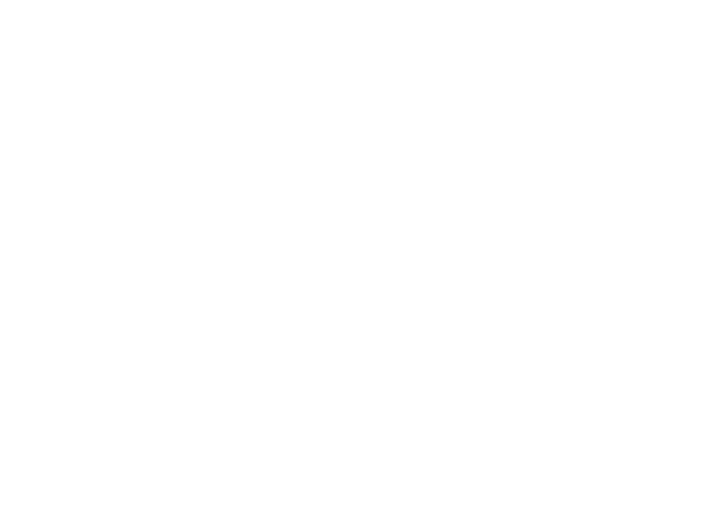

In [5]:
mpl.plot(multilat.loss_curve_)
mpl.yscale("log")

In [6]:
multilat.score(inputs, Dcor)

0.9990675263376012

generate new points for out-of-sample prediction

In [18]:
Dcor = np.random.rand(50000, 3)

#Dcor = []
#for i in np.arange(50):
#    for j in np.arange(50):
#        for k in np.arange(25):
#            Dcor.append([i/5-5,j/5-5,k/5])

x = 10
y = 10
z = 10
rmax = 20
rmin = 0
for i in range(len(Dcor)):
    if Dcor[i,0] < 0.5:
        Dcor[i,0] = -2*x*Dcor[i,0]
    else:
        Dcor[i,0] = 2*x*(Dcor[i,0] - 0.5)
        
    if Dcor[i,1] < 0.5:
        Dcor[i,1] = -2*y*Dcor[i,1]
    else:
        Dcor[i,1] = 2*y*(Dcor[i,1] - 0.5)
    
    Dcor[i,2] = z*Dcor[i,2]

OD = []
AD = []
BD = []
CD = []

NewDcor = []

for v in Dcor:
    if v[0]**2 + v[1]**2 + v[2]**2 < rmax**2 and rmin**2 < v[0]**2 + v[1]**2 + v[2]**2:
        OD.append(np.sqrt((v[0]-mic1[0])**2 + (v[1]-mic1[1])**2 + (v[2]-mic1[2])**2))
        AD.append(np.sqrt((v[0]-mic2[0])**2 + (v[1]-mic2[1])**2 + (v[2]-mic2[2])**2))
        BD.append(np.sqrt((v[0]-mic3[0])**2 + (v[1]-mic3[1])**2 + (v[2]-mic3[2])**2))
        CD.append(np.sqrt((v[0]-mic4[0])**2 + (v[1]-mic4[1])**2 + (v[2]-mic4[2])**2))
        NewDcor.append(v)
    
OD = np.array(OD)
AD = np.array(AD)
BD = np.array(BD)
CD = np.array(CD)
Dcor = np.array(NewDcor)
    
a = OD - AD
b = OD - BD
c = OD - CD

inputs = np.stack([a,b,c], axis = -1)

In [19]:
DcorSplit = np.hsplit(Dcor, 3)
DcorPredict = np.hsplit(multilat.predict(inputs), 3)

In [30]:
display(np.sqrt(np.mean((DcorSplit[0]-DcorPredict[0])**2)))
display(np.sqrt(np.mean((DcorSplit[1]-DcorPredict[1])**2)))
display(np.sqrt(np.mean((DcorSplit[2]-DcorPredict[2])**2)))

0.06866432440042992

0.07069829140464867

0.14459105343350592

In [32]:
fig = px.scatter(x=DcorSplit[0][0:10000][:,0],y=DcorPredict[0][0:10000][:,0],labels={'x':"Actual x",'y':"Predicted x"})
fig.add_shape(type='line',x0=-x,y0=-x,x1=x,y1=x,line=dict(color='Red',))
fig.update_layout(
    font_family="Times New Roman",
    font_color="black",
    font_size=35,
    autosize=False,
    width=600,
    height=600,
    showlegend=False)
fig.show()

In [31]:
fig = px.scatter(x=DcorSplit[1][0:10000][:,0],y=DcorPredict[1][0:10000][:,0],labels={'x':"Actual y",'y':"Predicted y"})
fig.add_shape(type='line',x0=-y,y0=-y,x1=y,y1=y,line=dict(color='Red',))
fig.update_layout(
    font_family="Times New Roman",
    font_color="black",
    font_size=35,
    autosize=False,
    width=600,
    height=600,
    showlegend=False)
fig.show()

In [33]:
fig = px.scatter(x=DcorSplit[2][0:10000][:,0],y=DcorPredict[2][0:10000][:,0],labels={'x':"Actual z",'y':"Predicted z"})
fig.add_shape(type='line',x0=0,y0=0,x1=x,y1=x,line=dict(color='Red',))
fig.update_layout(
    font_family="Times New Roman",
    font_color="black",
    font_size=35,
    autosize=False,
    width=600,
    height=600,
    showlegend=False)
fig.show()

In [6]:
def newton_raphson(d_measured,p,iterations=10):
    i = 0
    points = []
    # DEFINING SYMPY FUNCTIONS
    x,y,z = sp.symbols('x y z')
    OD = sp.sqrt((x-mic1[0])**2+(y-mic1[1])**2+(z-mic1[2])**2)
    AD = sp.sqrt((x-mic2[0])**2+(y-mic2[1])**2+(z-mic2[2])**2)
    BD = sp.sqrt((x-mic3[0])**2+(y-mic3[1])**2+(z-mic3[2])**2)
    CD = sp.sqrt((x-mic4[0])**2+(y-mic4[1])**2+(z-mic4[2])**2)

    f1 = OD-AD
    f2 = OD-BD
    f3 = OD-CD
    
    jac = sp.Matrix([[sp.diff(f1,x),sp.diff(f1,y),sp.diff(f1,z)],[sp.diff(f2,x),sp.diff(f2,y),sp.diff(f2,z)],[sp.diff(f3,x),sp.diff(f3,y),sp.diff(f3,z)]])
    jac_func = sp.lambdify((x,y,z),jac,modules='numpy')
    d1,d2,d3 = d_measured
    func = sp.lambdify((x,y,z),sp.Matrix([f1-d1,f2-d2,f3-d3]),modules='numpy')
    pnext = p
    while (i < iterations and np.linalg.norm(pnext-p)>1e-10) or i==0 :
        p = pnext
        points.append(p)
        p1,p2,p3 = p
        i+=1
        pnext = p-np.linalg.solve(jac_func(p1,p2,p3),func(p1,p2,p3))[:,0]
        pnext[2] = abs(pnext[2])
        #print("After " +str(i)+" iterations of NR: " + str(pnext))
        if abs(p1) >1e3:
            return [(0,0,0)]

    
    return np.array(points)

In [7]:
def solve(d_measured,p):
    x,y,z = sp.symbols('x y z')
    OD = sp.sqrt((x-mic1[0])**2+(y-mic1[1])**2+(z-mic1[2])**2)
    AD = sp.sqrt((x-mic2[0])**2+(y-mic2[1])**2+(z-mic2[2])**2)
    BD = sp.sqrt((x-mic3[0])**2+(y-mic3[1])**2+(z-mic3[2])**2)
    CD = sp.sqrt((x-mic4[0])**2+(y-mic4[1])**2+(z-mic4[2])**2)

    f1 = OD-AD
    f2 = OD-BD
    f3 = OD-CD
    
    jac = sp.Matrix([[sp.diff(f1,x),sp.diff(f1,y),sp.diff(f1,z)],[sp.diff(f2,x),sp.diff(f2,y),sp.diff(f2,z)],[sp.diff(f3,x),sp.diff(f3,y),sp.diff(f3,z)]])
    jac_func = sp.lambdify((x,y,z),jac,modules='numpy')
    d1,d2,d3 = d_measured
    func = sp.lambdify((x,y,z),sp.Matrix([f1-d1,f2-d2,f3-d3]),modules='numpy')
    def f(x):
        return func(x[0],x[1],x[2])[:,0]
    return opt.fsolve(f,p)

# TEST

In [40]:
x,y,z = sp.symbols('x y z')
OD = sp.sqrt((x-mic1[0])**2+(y-mic1[1])**2+(z-mic1[2])**2)
AD = sp.sqrt((x-mic2[0])**2+(y-mic2[1])**2+(z-mic2[2])**2)
BD = sp.sqrt((x-mic3[0])**2+(y-mic3[1])**2+(z-mic3[2])**2)
CD = sp.sqrt((x-mic4[0])**2+(y-mic4[1])**2+(z-mic4[2])**2)

f1 = OD-AD
f2 = OD-BD
f3 = OD-CD

f = sp.Matrix([f1,f2,f3])
f_lambda = sp.lambdify((x,y,z),f,modules='numpy')
def func(x):
    return f_lambda(x[0],x[1],x[2])[:,0]

In [57]:
# Position of drone
x0 = [-1,-1,1]
x,y,z = x0

# Measured differences
d1,d2,d3 = f_lambda(x,y,z)[:,0]
display(d1,d2,d3)

start = time.time()
# Neural network gives first guess
p = multilat.predict([[d1,d2,d3]])[0,:]
print("Neural Network predicts: " + str(p))

# Newton Raphson optimizes
points = newton_raphson([d1,d2,d3],p,10)
print("Newton Raphson gives: " + str(points))
print("Actual position was: " + str(x0))
end = time.time()
print("\nTook "+str(end-start) + "s")

0.31783724519578205

-0.07569618590977956

-0.862568780649958

Neural Network predicts: [-0.91013373 -0.95056261  1.0225398 ]
Newton Raphson gives: [[-0.91013373 -0.95056261  1.0225398 ]
 [-0.99736716 -0.99820556  1.00380799]
 [-1.0000004  -1.00000097  1.00001453]
 [-1.         -1.          1.        ]]
Actual position was: [-1, -1, 1]

Took 0.07232952117919922s


In [58]:
# Position of drone
x0 = np.array([1,1,1])
x,y,z = x0
# Measured differences
d1,d2,d3 = f_lambda(x,y,z)[:,0]
display(d1,d2,d3)

start = time.time()
# Neural network gives first guess
p = multilat.predict([[d1,d2,d3]])[0,:]
print("Neural Network predicts: " + str(p))
# scipy optimizes
points = solve([d1,d2,d3],p)
print("Newton Raphson gives: " + str(points))
print("Actual position was: " + str(x0))
end = time.time()
print("\nTook "+str(end-start) + "s")

-0.7174389352143007

-0.4432769395921978

0.6060183069583831

Neural Network predicts: [1.14589744 1.06220455 0.95586808]
Newton Raphson gives: [1. 1. 1.]
Actual position was: [1 1 1]

Took 0.0763397216796875s


In [ ]:
def predict(d):
    d1,d2,d3 = d
    p = multilat.predict([[d1,d2,d3]])[0,:]
    display(p)
    points = newton_raphson([d1,d2,d3],p,10)
    #points = newton_raphson([d1,d2,d3],np.array([0,0,1]),10)
    return points[-1]

def test(x0):
    x,y,z = x0
    d = f_lambda(x,y,z)[:,0]
    return predict(d)

In [ ]:
test([-0.28651818,  1.26923461, -1.61429645])

In [ ]:
DcorPred = np.zeros([len(Dcor),3])
for i in range(len(Dcor)):
    DcorPred[i,:] = test(Dcor[i])

In [ ]:
fig = px.scatter(x=Dcor[:,0],y=DcorPred[:,0],labels={'x':"Actual x",'y':"Predicted x"})
fig.add_shape(type='line',x0=-x,y0=-x,x1=x,y1=x,line=dict(color='Red',))

fig.show()

In [ ]:
def test_convergence(x0):
    

    # Measured differences
    d1,d2,d3 = f_lambda(x,y,z)[:,0]

    # Neural network gives first guess
    p = multilat.predict([[d1,d2,d3]])[0,:]
    # Newton Raphson optimizes
    p_end = newton_raphson([d1,d2,d3],p,10)
    
    if str(p_end) == "DIVERGENCE":
        return -1
    elif np.linalg.norm(p_end-x0) < 1e-1:
        return 1
    else:
        return 0

In [ ]:
z = 2
N = 10
test = np.zeros([N,N])
xs = np.linspace(-5,5,N)
ys = np.linspace(-5,5,N)
for i in range(N):
    for j in range(N):
        test[i,j] = test_convergence([xs[i],xs[j],z])

In [ ]:
px.imshow(x=xs,y=ys,img=test)

In [ ]:
N = 100000
d = 3
xs = -d+np.random.uniform(size=N)*2*d
ys = -d+np.random.uniform(size=N)*2*d
zs =  np.ones(N)*1
convergence = []
t = 1
i = 0
while t == 1:
    i += 1
    t = test_convergence([xs[i],ys[i],zs[i]])
    if t != 1:
        display("Did not converge at iteration "+str(i))
    elif i % 100 == 1:
        display("No divergence before i = " + str(i))


# TEST ON DATA

In [8]:
def newton_raphson(d_measured,p,iterations=20):
    i = 0
    points = []
    # DEFINING SYMPY FUNCTIONS
    x,y,z = sp.symbols('x y z')
    OD = sp.sqrt((x-mic1[0])**2+(y-mic1[1])**2+(z-mic1[2])**2)
    AD = sp.sqrt((x-mic2[0])**2+(y-mic2[1])**2+(z-mic2[2])**2)
    BD = sp.sqrt((x-mic3[0])**2+(y-mic3[1])**2+(z-mic3[2])**2)
    CD = sp.sqrt((x-mic4[0])**2+(y-mic4[1])**2+(z-mic4[2])**2)

    f1 = OD-AD
    f2 = OD-BD
    f3 = OD-CD
    
    jac = sp.Matrix([[sp.diff(f1,x),sp.diff(f1,y),sp.diff(f1,z)],[sp.diff(f2,x),sp.diff(f2,y),sp.diff(f2,z)],[sp.diff(f3,x),sp.diff(f3,y),sp.diff(f3,z)]])
    jac_func = sp.lambdify((x,y,z),jac,modules='numpy')
    d1,d2,d3 = d_measured
    func = sp.lambdify((x,y,z),sp.Matrix([f1-d1,f2-d2,f3-d3]),modules='numpy')
    pnext = p
    while (i < iterations and np.linalg.norm(pnext-p)>1e-10) or i==0 :
        p = pnext
        points.append(p)
        p1,p2,p3 = p
        i+=1
        pnext = p-np.linalg.solve(jac_func(p1,p2,p3),func(p1,p2,p3))[:,0]
        pnext[2] = abs(pnext[2])
        #print("After " +str(i)+" iterations of NR: " + str(pnext))
        if abs(p1) >1e3:
            return [(0,0,0)]

    
    return np.array(points)

In [9]:
def predict(d):
    d1,d2,d3 = d
    p = multilat.predict([[d1,d2,d3]])[0,:]
    #display(p)
    points = newton_raphson([d1,d2,d3],p,10)[-1]
    #points = solve([d1,d2,d3],p)
    return points

def test(x0):
    x,y,z = x0
    d = f_lambda(x,y,z)[:,0]
    return predict(d)

In [10]:
def select_peak(y,threshhold=.5,exp_width=2000):
    y = y[len(y)//2-exp_width//2:len(y)//2+exp_width//2]
    peakheight = np.max(y)
    max_arg = np.argmax(y)
    relheights = y/peakheight
    lower = np.where(relheights < threshhold)[0]
    left = np.max(lower[lower<max_arg])
    right = np.min(lower[lower>max_arg])
    peakargs = len(y)//2-exp_width//2+np.array(range(left,right))
    return peakargs,y[peakargs]

def smoothe(y,window=2):
    res = np.array(y)
    for i in range(1,window+1):
        res += np.roll(y,i)
        res += np.roll(y,-i)
    return res/(2*window+1)

def peak_cross(signal1,signal2):
    cor = sig.correlate(signal1,signal2,mode='same')
    x,y = select_peak(cor,0.99)
    d = sum(x*y)/sum(y)
    return d-1000

def equalize(signal):
    ft = fft(signal)
    eq_ft = []
    for i in ft:
        if abs(i) > 1e-10:
            eq_ft.append(i/abs(i))
        else:
            eq_ft.append(0)
    return(np.real(ifft(eq_ft)))

In [11]:
def distance_from_cc(signal1,signal2):
    cor = sig.correlate(equalize(signal1),equalize(signal2),mode="same")
    
    return [(len(cor)//2-np.argmax(cor))/48e3*343,signal_strength(cor)]

def signal_strength(cor):
    maxima = cor[sig.argrelmax(cor)[0]]
    maxima_sorted = np.sort(maxima)
    return maxima_sorted[-1]/maxima_sorted[-2]

def get_position(signals,t0,dt):
    y0,y1,y2,y3 = signals
    a,b,c = distance_from_cc(y0[t0:t0+dt],y1[t0:t0+dt]),distance_from_cc(y0[t0:t0+dt],y2[t0:t0+dt]),distance_from_cc(y0[t0:t0+dt],y3[t0:t0+dt])
    return predict([-a[0],-b[0],-c[0]]),(a[1],b[1],c[1])

def get_position_nn(signals,t0,dt):
    y0,y1,y2,y3 = signals
    a,b,c = distance_from_cc(y0[t0:t0+dt],y1[t0:t0+dt]),distance_from_cc(y0[t0:t0+dt],y2[t0:t0+dt]),distance_from_cc(y0[t0:t0+dt],y3[t0:t0+dt])
    return multilat.predict([[-a[0],-b[0],-c[0]]])[0,:],(a[1],b[1],c[1])

In [12]:
file = "movement1"

y0, sr = librosa.load(file+"_Scarlett 18i20 3rd Gen Multichannel_capture_AUX0.wav",sr=48000)
y1, sr = librosa.load(file+"_Scarlett 18i20 3rd Gen Multichannel_capture_AUX1.wav",sr=48000)
y2, sr = librosa.load(file+"_Scarlett 18i20 3rd Gen Multichannel_capture_AUX2.wav",sr=48000)
y3, sr = librosa.load(file+"_Scarlett 18i20 3rd Gen Multichannel_capture_AUX3.wav",sr=48000)


In [321]:
t0 = 200000
dt = 5000

signals = [y0[t0:t0+dt],y1[t0:t0+dt],y2[t0:t0+dt],y3[t0:t0+dt]]
distances = []
strengths = []
for i in range(len(signals)):
    for j in range(len(signals)):
        if j > i:
            x,y = distance_from_cc(signals[i],signals[j])
            distances.append(x)
            strengths.append(y)
strengths

[1.0492343, 1.9287344, 2.7460923, 1.3078648, 1.3649426, 2.1330032]

In [322]:
predict(-np.array([distances[0],distances[0]+distances[3],distances[0]+distances[4]]))

array([-0.0465977 , -0.00547783,  2.126581  ])

In [323]:
get_position([y0,y1,y2,y3],600000,10000)

(array([-0.02177622, -0.05532899,  0.8700379 ]),
 (1.0895118, 1.6047915, 1.7527701))

In [384]:
t0 = int(48000*0)
x = []
y = []
z = []
s = []
t = []
sampling_time = 5000
N = 200
for i in range(N):
    pos,strength = get_position_nn([y0,y1,y2,y3],t0+i*sampling_time,sampling_time)
    x.append(pos[0])
    y.append(pos[1])
    z.append(pos[2])
    s.append(np.min(strength))
    t.append(t0+i*sampling_time)
t = np.array(t)/48000

In [16]:
t0 = int(48000*13)
x = []
y = []
z = []
s = []
t = []
sampling_time = 5000
N = 200
for i in range(N):
    pos,strength = get_position([y0,y1,y2,y3],t0+i*sampling_time,sampling_time)
    x.append(pos[0])
    y.append(pos[1])
    z.append(pos[2])
    s.append(np.min(strength))
    t.append(t0+i*sampling_time)
t = np.array(t)/48000

In [17]:
data = {
    't':t,
    'x':x,
    'y':y,
    'z':z,
    's':s
}
df = pd.DataFrame(data)

In [18]:
fig = px.line(df,'t',['x','y','z'],labels={"t":"time (s)","value": "distance (m)"})
fig.update_layout(
    font_family="Times New Roman",
    font_color="black",
    font_size=25,
    showlegend=True)
fig.show()

In [328]:
fig = px.line(df,'t',['x','y','z'])

#fig.update_layout(yaxis_range=[-3,10])
fig.show()

In [28]:
((t[-1]-t[0])/6)**(-1)

0.28944723618090457

<IPython.core.display.Javascript object>


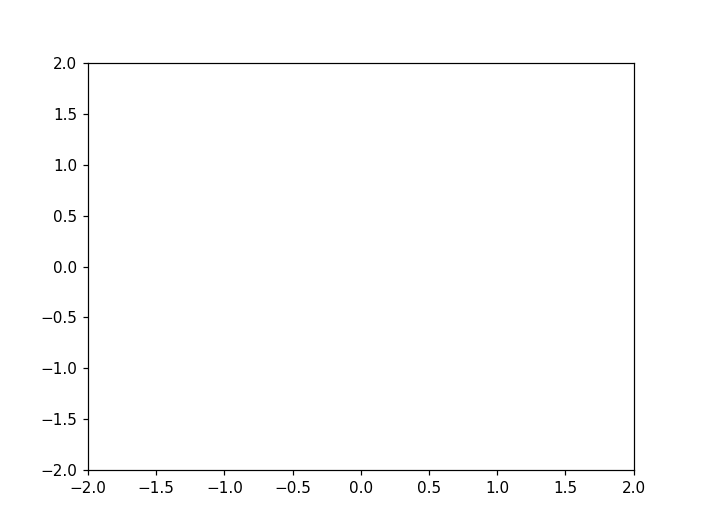

MovieWriter ffmpeg unavailable; using Pillow instead.


In [26]:
fig,ax = plt.subplots(1,1)
ax.set_xlim(min(t), max(t))
ax.set_ylim(-1,12)
def animate(i):
    #if i == 0:
    #    ax.legend()
    ax.plot(t[:i],x[:i],color='blue',lw=0.9,label='x')
    ax.plot(t[:i],y[:i],color='red',lw=0.9,label='y')
    ax.plot(t[:i],z[:i],color='green',lw=0.9,label='z')

anim = animation.FuncAnimation(fig, animate, frames=N, interval=30)
plt.grid()
ax.set_xlabel("time (s)")
ax.set_ylabel("position (m)")

#plt.show()
anim.save('dronemovement.gif',fps=30)

<IPython.core.display.Javascript object>


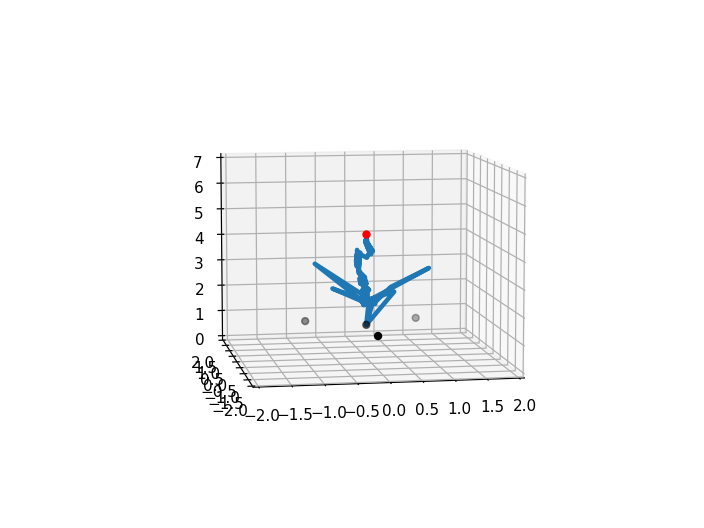

MovieWriter ffmpeg unavailable; using Pillow instead.


In [25]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
f = 1.82/np.sqrt(3)
micsx = [0,0,np.sqrt(3)/2*f,-np.sqrt(3)/2*f]
micsy = [0,-1*f,1/2*f,1/2*f]
micsz = [1.1,1.1,1.1,1.1]
def animate(i):
    
    ax.clear()
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    ax.set_zlim(0,7)
    ax.plot(x[:i],y[:i],z[:i]+np.ones(i)*1.1,lw=3)
    ax.scatter(x[i],y[i],z[i]+1.1,s=20,color="red")
    ax.scatter(micsx,micsy,micsz,s=20,color="black")
    ax.view_init(elev=8, azim=-100)


anim = animation.FuncAnimation(fig, animate, frames=N, interval=30)
#plt.show()
anim.save('dronemovement3d.gif',fps=30)

In [193]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Scatter(x=[1], y=[1],
                     mode="lines",
                     line=dict(width=2, color="blue"))],
    layout=go.Layout(
        xaxis=dict(range=[min(df['t']), max(df['t'])], autorange=False, zeroline=True),
        yaxis=dict(range=[-1, 6], autorange=False, zeroline=False),
        title_text="Animation", hovermode="closest",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None, {"frame": {"duration": N*5000//48000*3, "redraw": False}}])])]),
    frames=[go.Frame(
        data=[go.Scatter(
            x=df['t'][:k],
            y=z[:k],
            mode="lines",
            marker=dict(color="red", size=10))])

        for k in range(N)]
)
fig.show()

In [187]:
N*5000//48000

31

In [319]:
x,y,z = np.median(x),np.median(y),np.median(z)
f = 1.82/np.sqrt(3)

data = {
    'x':[0,0,np.sqrt(3)/2*f,-np.sqrt(3)/2*f,0,x],
    'y': [0,0,1/2*f,1/2*f,-1*f,y],
    'z': np.array([-1.19,0,0,0,0,z])+1.19,
    'point': ["origin","mic","mic","mic","mic","drone"]
}
df = pd.DataFrame(data)
fig = px.scatter_3d(df,x='x',y='y',z='z',color='point')

"""fig.update_layout(
    scene = dict(
        xaxis = dict(nticks=4, range=[-2,1],),
                     yaxis = dict(nticks=4, range=[-1.5,1.5],),
                     zaxis = dict(nticks=4, range=[0,3],),),
    width=700,
    margin=dict(r=20, l=10, b=10, t=10))"""
fig.update_layout(
    font_family="Times New Roman",
    font_color="black",
    font_size=15,
    showlegend=False)

fig.show()

In [ ]:
t0 = 50000
dt = 5000
signal0 = y0[t0:t0+dt]
signal1 = y1[t0:t0+dt]
signal2 = y2[t0:t0+dt]
cor01 = sig.correlate(signal0/max(signal0),signal1/max(signal0),mode='same')
cor02 = sig.correlate(signal0/max(signal0),signal2/max(signal0),mode='same')
cor12 = sig.correlate(signal1/max(signal0),signal2/max(signal0),mode='same')
cor00 = sig.correlate(signal0,signal0,mode='same')


fig = px.line(cor01)
fig.add_scatter(y=cor12)
fig.add_scatter(y=cor02)
#fig.add_scatter(y=cor02/max(cor02))
#fig.add_scatter(y=sig.correlate(cor02,cor00,mode='same'))


#fig = px.line(sig.correlate(signal1,signal1,mode='same'))
#fig.add_scatter(y=sig.correlate(signal0,signal2,mode='same'))
#fig.add_scatter(y=sig.correlate(signal1,signal2,mode='same'))
#fig.add_scatter(y=1/10*sig.correlate(sig.correlate(signal0,signal1,mode='same'),1*sig.correlate(signal1,signal1,mode='same'),mode='same'))

In [ ]:
distance_from_cc(signal0,signal1)

In [ ]:
t0 = 240000
dt = 10000

In [ ]:
distance_from_cc(y0[t0:t0+dt],y1[t0:t0+dt])+distance_from_cc(y1[t0:t0+dt],y2[t0:t0+dt])

In [4]:
343*(1-1/1.005)

1.7064676616914964